In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
w_service_malawi = pd.read_csv("Raw_Data\malawi\w_service_malawi.csv")
df = w_service_malawi.copy()
df["date"] = pd.to_datetime(
    df["date"], format="%b-%y", errors="coerce"
)

# df["date"] = df["date"].dt.strftime("%b-%y")


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\faroo\AppData\Local\Temp\ipykernel_14128\501774057.py:1: SyntaxWarning: invalid escape sequence '\m'
  w_service_malawi = pd.read_csv("Raw_Data\malawi\w_service_malawi.csv")


In [26]:
display(df.head())
# Group by date and sum across all zones
df_sum = df.groupby("date", as_index=False)[["total_consumption", "metered"]].sum().sort_values("date")
display(df_sum.head())

,country,zone,date,households,tests_chlorine,tests_ecoli,tests_conducted_chlorine,test_conducted_ecoli,test_passed_chlorine,tests_passed_ecoli,w_supplied,total_consumption,metered,ww_capacity
0,malawi,Capital Hill,2020-01-01,103168,150,100,140,88,126,80,466397,1011107,29931,70608
1,malawi,Capital Hill,2020-02-01,103168,100,150,92,133,76,128,367683,742706,24524,10358
2,malawi,Capital Hill,2020-03-01,103168,200,200,185,163,183,135,323820,714675,26380,63715
3,malawi,Capital Hill,2020-04-01,103168,200,200,141,169,128,150,258841,610857,23070,34924
4,malawi,Capital Hill,2020-05-01,103168,100,200,78,160,69,152,486099,1105186,30400,67492


,date,total_consumption,metered
0,2020-01-01,2601813,80448
1,2020-02-01,3005553,79160
2,2020-03-01,2184672,81996
3,2020-04-01,2416659,69676
4,2020-05-01,3488595,94758


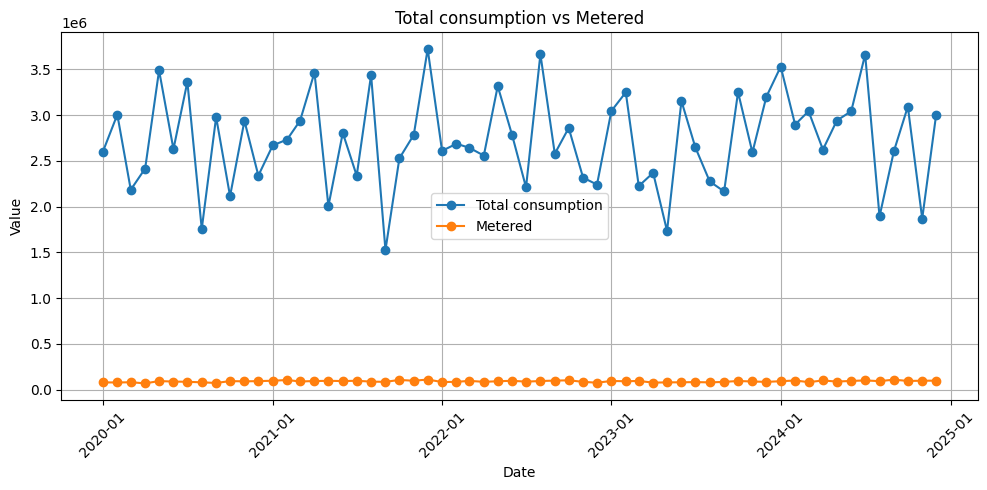

In [ ]:
from matplotlib.dates import DateFormatter

# Read your data; CSV should have columns: date,total_consumption,metered
# Example CSV header: date,total_consumption,metered
# df = w_service_malawi

plt.figure(figsize=(10,5))
plt.plot(df_sum['date'], df_sum['total_consumption'], marker='o', label='Total consumption')
plt.plot(df_sum['date'], df_sum['metered'], marker='o', label='Metered')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Total consumption vs Metered')
plt.legend()
plt.grid(True)
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

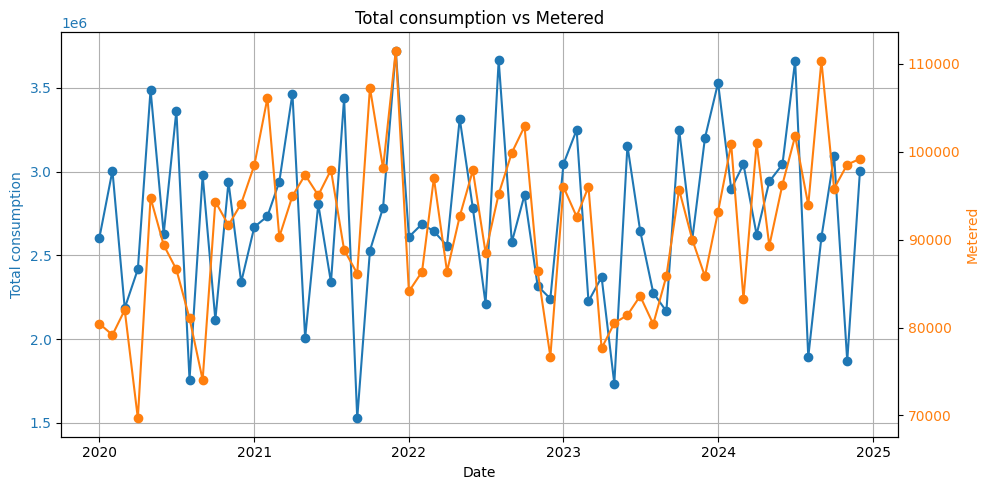

In [32]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Primary axis for total_consumption
ax1.plot(df_sum['date'], df_sum['total_consumption'], marker='o', color='tab:blue', label='Total consumption')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total consumption', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for metered
ax2 = ax1.twinx()
ax2.plot(df_sum['date'], df_sum['metered'], marker='o', color='tab:orange', label='Metered')
ax2.set_ylabel('Metered', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Common elements
plt.title('Total consumption vs Metered')
ax1.grid(True)
fig.tight_layout()
plt.xticks(rotation=45)

plt.show()
